<a href="https://colab.research.google.com/github/Hyun-Ho95/Web1/blob/master/Mini_Project1__%EA%B5%AD%EB%AF%BC%EB%8F%99%EC%9D%98%EC%B2%AD%EC%9B%90_%EC%8A%A4%ED%81%AC%EB%9E%98%ED%95%91_%EB%B0%95%ED%98%84%ED%98%B8_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 웹 데이터 스크래핑

## 라이브러리 불러오기

In [ ]:
import time
import pandas as pd
import requests

## url 수집 및 데이터 불러오기
1) requests로 불러오기

In [ ]:
#국민동의청원 홈은 requests.get으로 가능한데 동의종료 청원은 requests.get으로 불가능
url = 'https://petitions.assembly.go.kr/closed/agreeEnded'
response = requests.get(url)
response.status_code
#requests.get으로는 안됨

404

2) requests로 불러오기 + header 사용

In [ ]:
#header 사용해도 불가능
headers = {"user-agent": "Mozilla/5.0"}
response = requests.get(url)
response.status_code

404

3-1) '네트워크 -> 검사' 파일저장방식 및 위치 찾기(1가지 청원에 관한 내용)

In [ ]:
#청원링크 타고 들어갔을 때 '네트워크'->'Fetch/XHR' 항목에 생기는 주소 값
#키값으로 이루어져 있는 json 형식
#응답헤더 또한 json
#json 형식으로 데이터 받기
url_link = 'https://petitions.assembly.go.kr/api/petits/E28F70BC6E0550F1E054B49691C1987F?petitId=E28F70BC6E0550F1E054B49691C1987F&sttusCode='

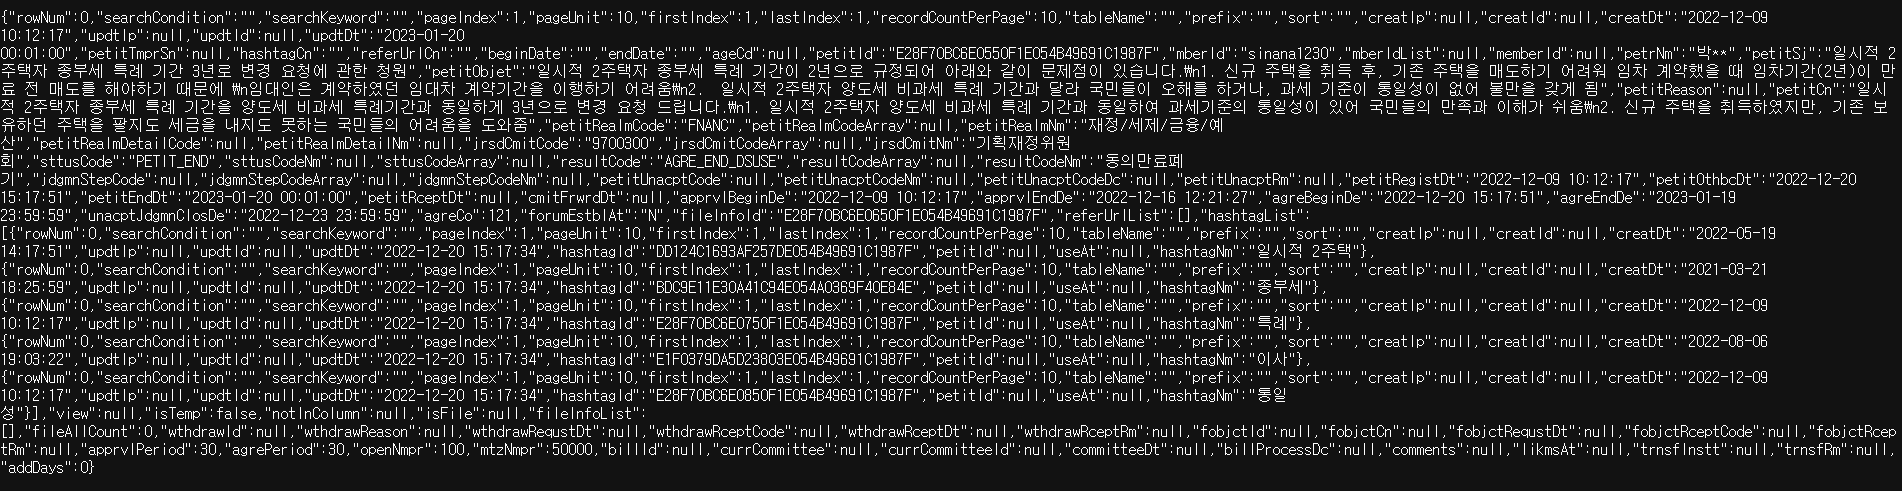

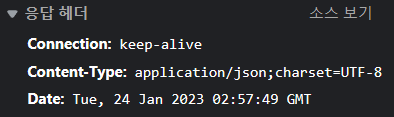

3-2) '네트워크 -> 검사' 파일저장방식 및 위치 찾기 (여러가지 청원에 관한 내용)

In [ ]:
# 청원 페이지 변경 시 생기는 '네트워크'->'Fetch/XHR' 항목에 생기는 주소 값
# 마찬가지로 키값으로 이루어져 있는 json 형식
# 응답헤더 또한 json
url_link_list = 'https://petitions.assembly.go.kr/api/petits?pageIndex=2&recordCountPerPage=8&sort=AGRE_END_DE-&searchCondition=sj&searchKeyword=&petitRealmCode=&sttusCode=PETIT_FORMATN,CMIT_FRWRD,PETIT_END&resultCode=BFE_OTHBC_WTHDRAW,PROGRS_WTHDRAW,PETIT_UNACPT,APPRVL_END_DSUSE,ETC_TRNSF&notInColumn=RESULT_CODE&beginDate=20210124&endDate=20230124&ageCd='

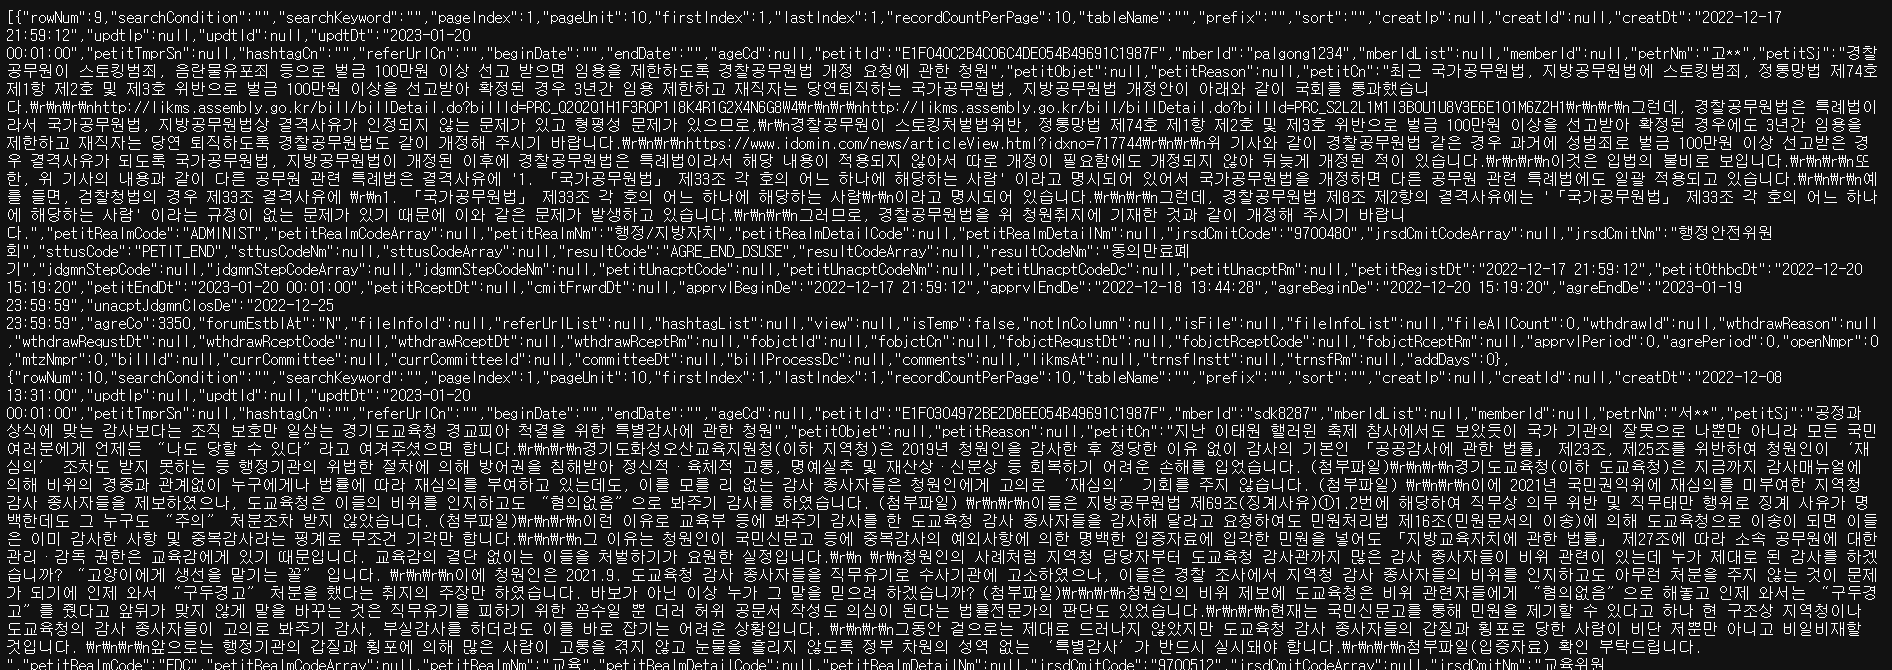

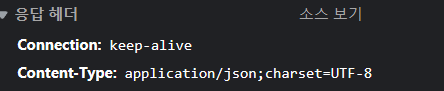

4) 여러가지 청원에 관한 내용 보기위한 url 수집(json) 및 f-string 설정

In [ ]:
page_index = 1

# 페이지 번호와 동의시작 날짜 및 동의종료 날짜는 f-string으로 변경 가능하도록 설정

url = f'https://petitions.assembly.go.kr/api/petits?pageIndex={page_index}&recordCountPerPage=8&nt_per_pagesort=AGRE_END_DE-&searchCondition=sj&searchKeyword=&petitRealmCode=&sttusCode='
url = f'{url}PETIT_FORMATN,CMIT_FRWRD,PETIT_END&resultCode=BFE_OTHBC_WTHDRAW,PROGRS_WTHDRAW,PETIT_UNACPT,APPRVL_END_DSUSE,ETC_TRNSF&notInColumn='
url = f'{url}RESULT_CODE&beginDate=20210124&endDate=20230124&ageCd='


response = requests.get(url)
response.status_code
# 네트워크 -> 검사 -> Fetch/XHR -> 값복사한 url 사용 후 requests 하니까 성공!

json_list = response.json()
json_list
# .json()은 requests 모듈에 포함된 메서드
# response.text 나 bs(response.text)하는 것보다 훨씬 깔끔하고 보기좋다.
# json 형식의 데이터는 .json()으로 읽자

[{'rowNum': 1,
  'searchCondition': '',
  'searchKeyword': '',
  'pageIndex': 1,
  'pageUnit': 10,
  'firstIndex': 1,
  'lastIndex': 1,
  'recordCountPerPage': 10,
  'tableName': '',
  'prefix': '',
  'sort': '',
  'creatIp': None,
  'creatId': None,
  'creatDt': '2020-12-08 19:25:09',
  'updtIp': None,
  'updtId': None,
  'updtDt': '2021-01-28 00:01:00',
  'petitTmprSn': None,
  'hashtagCn': '',
  'referUrlCn': '',
  'beginDate': '',
  'endDate': '',
  'ageCd': None,
  'petitId': 'B5F25B725BF96A41E054A0369F40E84E',
  'mberId': 'yps001',
  'mberIdList': None,
  'memberId': None,
  'petrNm': '윤**',
  'petitSj': '여성가족부 폐지 등에 관한 청원',
  'petitObjet': None,
  'petitReason': None,
  'petitCn': '여성가족부는,\n보편적 가족서비스의 확대와 여성 청소년 안전강화에 중점을 둔 정책추진을 근거로  2020년 예산 1조 1,264억원(19년 대비 4.3%증가), 2021년 1조 2,325억으로 큰 수준의 예산을 차지하고 있습니다.\n\n여성가족부는,\n여성폭력방지 추진, 한부모,다문화 가정 아이돌봄서비스, 사회 성평등 문화 확산 및 여성 경제활동 촉진, 청소년 주도적 참여활동 및 사회안전망 강화를 표방하고 있으나 실상 수행하는 업무와 성과는 예산의 크기에 미치지 못한다는 지적을 받고 있으며, 그나마 있는 업무 자체도 다른 부처와 많이 

## 해당 청원의 petitId 가져오기

In [ ]:
# 위에서 읽은 json 데이터 
df = pd.DataFrame(json_list)
# df 형식으로 바꿔주었는데 빈 프레임
# 모든 json 데이터를 한 리스트에 넣고 한 번에 데이터프레임으로 바꿔주어야 한다고 한다

In [ ]:
# 청원내용 상세 페이지 주소
df['petitId'][0] # = 'B5F25B725BF96A41E054A0369F40E84E'
petitId = 'B5F25B725BF96A41E054A0369F40E84E'
inside_url = f'https://petitions.assembly.go.kr/api/petits/{petitId}?petitId={petitId}&sttusCode='
# 청원의 취지는 목록 페이지 url엔 없고 inside_url에 들어가야 'petitObj'로 존재
# 청원목록 페이지 url 뒤에 petit id 들어감

response_inside = requests.get(inside_url)
response_inside.json()
# petitObjet : 청원취지 값있는 것 확인

{'rowNum': 0,
 'searchCondition': '',
 'searchKeyword': '',
 'pageIndex': 1,
 'pageUnit': 10,
 'firstIndex': 1,
 'lastIndex': 1,
 'recordCountPerPage': 10,
 'tableName': '',
 'prefix': '',
 'sort': '',
 'creatIp': None,
 'creatId': None,
 'creatDt': '2020-12-08 19:25:09',
 'updtIp': None,
 'updtId': None,
 'updtDt': '2021-01-28 00:01:00',
 'petitTmprSn': None,
 'hashtagCn': '',
 'referUrlCn': '',
 'beginDate': '',
 'endDate': '',
 'ageCd': None,
 'petitId': 'B5F25B725BF96A41E054A0369F40E84E',
 'mberId': 'yps001',
 'mberIdList': None,
 'memberId': None,
 'petrNm': '윤**',
 'petitSj': '여성가족부 폐지 등에 관한 청원',
 'petitObjet': '과도한 예산에 비해 그 자격에 맞는 국정업무를 수행하지 못하고 있는 여성가족부의 폐지 또는 부처자격 격하를 위함임.',
 'petitReason': None,
 'petitCn': '여성가족부는,\n보편적 가족서비스의 확대와 여성 청소년 안전강화에 중점을 둔 정책추진을 근거로  2020년 예산 1조 1,264억원(19년 대비 4.3%증가), 2021년 1조 2,325억으로 큰 수준의 예산을 차지하고 있습니다.\n\n여성가족부는,\n여성폭력방지 추진, 한부모,다문화 가정 아이돌봄서비스, 사회 성평등 문화 확산 및 여성 경제활동 촉진, 청소년 주도적 참여활동 및 사회안전망 강화를 표방하고 있으나 실상 수행하는 업무와 성과는 예산의 크기에 미치지 못한다는 지적을 받고

## 한 페이지를 입력받아, 그 페이지에 존재하는 청원내용을 가져오는 함수



In [ ]:
def get_one_page(page_no):
    try:
        #1. url 수집(검사 -> 네트워크 -> Fetch/XHR 에서 페이지 넘길 때 생성되는 요청 url)
        #   날짜는 지정할 수 있도록 begin_date와 end_date를 f-string으로 설정 ( 2022년 1년간 청원 모을 예정)
        url = f'https://petitions.assembly.go.kr/api/petits?pageIndex={page_no}&recordCountPerPage=8&sort=AGRE_END_DE-&searchCondition=sj&searchKeyword=&petitRealmCode=&sttusCode='
        url = f'{url}PETIT_FORMATN,CMIT_FRWRD,PETIT_END&resultCode=BFE_OTHBC_WTHDRAW,PROGRS_WTHDRAW,PETIT_UNACPT,APPRVL_END_DSUSE,ETC_TRNSF&notInColumn='
        url = f'{url}RESULT_CODE&beginDate={begin_date}&endDate={end_date}&ageCd='

        #2. Fetch/XHR에서 수집한 url로 requests.get 하기
        response = requests.get(url)

        #3. requests하여 얻은 값 json형식으로 읽기 
        #   검사 -> 네트워크 -> 머리글 에서 응답 헤더 json인것 확인 (application/json;charset=UTF-8)
        many_json = response.json()

        #4. json파일 데이터프레임으로 저장
        df = pd.DataFrame(many_json)
        

        #5. 각 게시물의 고유번호로 게시물들의 url 수집
        #    df['petitId'] => 게시물들의 고유번호 값
        url_list = []
        unique_petit = df['petitId']
        for i in unique_petit:
            inside_url = f'https://petitions.assembly.go.kr/api/petits/{i}?petitId={i}&sttusCode='
            url_list.append(inside_url)
        
        # 3.수집된 url들, 각url 마다 json 형식으로 읽어서 리스트로 생성
        urls_list = []
        for i in url_list:  
            response_ =requests.get(i)
            urls_json = response_.json()
            urls_list.append(urls_json)
                
        # 4.리스트로 된 게시물 url들 데이터 프레임으로 만들기
        df_urls = pd.DataFrame(urls_list)

        # 5.여러 컬럼 중에 원하는 항목만 col 변수에 할당
        col = ['petitRealmCode', 'petitRealmNm', 'petitSj', 'petitObjet', 
               'petitCn', 'jrsdCmitNm', 'resultCodeNm', 'petitEndDt', 'agreBeginDe', 'agreCo']

        # 6. 할당 된 컬럼명 알기 쉽게 이름 변경 해주기 (length => 컬럼 개수에 맞게 잘 맞춰서 지정해주어야함)
        df_urls = df_urls[col]
        cols = ['분야코드', '분야', '청원제목', '청원취지', '청원내용', '심사위원회', '청원결과', '청원동의 종료일', '청원동의 시작일','청원동의수' ]
        df_urls.columns = cols  
        
        # 동기분이 하신 컬럼명 설정 방법
        # df_urls = df_urls[col]
        # df_urls.rename(columns={'petitRealmCode' : '분야코드', 'petitRealmNm' : '분야', 'petitSj' : '청원제목',
        #                 'petitObjet' : '청원취지', 'petitCn' : '청원내용', 'jrsdCmitNm' : '심사위원회',
        #                 'resultCodeNm' : '청원결과', 'petitEndDt' : '청원종료일', 
        #                 'agreBeginDe' : '청원동의시작일', 'agreCo': '청원동의수'}, inplace=True)

        return df_urls

    except Exception as e:
        print(f'{page_no} : 없는 페이지 입니다. 다시 입력해주세요.')

## 2022년 한 해로 기간 설정

In [ ]:
# 2022/01/01부터 2022/12/31 데이터 가져오기
begin_date = 20220101
end_date = 20221231

## 함수 잘 만들어졌는지 1페이지로 확인

In [ ]:
# 1페이지 내용 확인
page_no = 1
get_one_page(page_no)

,분야코드,분야,청원제목,청원취지,청원내용,심사위원회,청원결과,청원동의 종료일,청원동의 시작일,청원동의수
0,TRIT,국토/해양/교통,"인천 미추홀구뿐만 아니라 전국적인 ‘나 홀로 아파트, 빌라’ 전세사기에 관한 청원",저는 전세사기 피해자입니다.\r\n\r\n전국적으로 발생한 전세사기 피해에 대한 현...,○ 문제점\r\n낙찰자가 생겨 곧 퇴거해야하는 피해자들을 위한 ‘전세사기피해지원센터...,국토교통위원회,동의만료폐기,2022-12-31 00:01:00,2022-11-30 09:52:01,2250
1,TRIT,국토/해양/교통,"모든 학원, 상가 복도 cctv 의무화에 관한 청원",CCTV없는곳에서 일어나는 폭력을 막아주세요.,안녕하세요.\n봉담읍에 사는 초등학생 아이를 둔 엄마입니다.\n저희아이는 학원강의...,국토교통위원회,동의만료폐기,2022-12-31 00:01:00,2022-11-30 09:53:21,283
2,HMCCS,보건의료,간호법 제정에 관한 청원,"'간호법' 제정을 통해 간호사의 영역과 업무 범위를 명확화 하고, 간호 서비스 개선...","현재 96개국에 '간호법'이 있고, OECD 국가 38개국 중 미국을 포함한 33개...",보건복지위원회,동의만료폐기,2022-12-31 00:01:00,2022-11-30 09:52:59,177
3,HMCCS,보건의료,난치성 편두통 환자를 위한 CGRP 표적 치료제의 급여혜택 강화 촉구에 관한 청원,WHO에서는 세계에서 두번째로 질병 부담이 높은 질환이 편두통이라고 발표했습니다. ...,"건강보험심사평가원에서 공개한 고시 자료[1]를 보면 대상 질환의 특성으로서 ""삽화편...",보건복지위원회,동의만료폐기,2022-12-29 00:01:00,2022-11-28 16:39:49,524
4,FNANC,재정/세제/금융/예산,가상자산 위믹스 코인 거래지원종료에 관한 DAXA의 처리 투명성과 갑질논란에 관한 청원,한국거래소협회 DAXA에 의한 위믹스코인 거래지원 종료에 대한 투명성 조사와 갑질 ...,한국 거래소협회 DAXA는 10월27일 계획유통량과 실제유통량의 차이를 원인으로 삼...,정무위원회,동의만료폐기,2022-12-29 00:01:00,2022-11-28 16:40:33,6165
5,MSFRTN,재난/안전/환경,기업의 과대포장에 관한 청원,1) 과대포장 문제를 해결하기 위함입니다.\r\n2) 국가의 일회용품 소비를 줄이기...,환경 문제가 날이 갈수록 심화되고 있습니다. 세계가 노력하고 있지만 여전히 부족하며...,환경노동위원회,동의만료폐기,2022-12-29 00:01:00,2022-11-28 16:37:57,157
6,HMCCS,보건의료,크론병을 앓고 있는 아들의 건강보험 적용 요청에 관한 청원,크론병 환자의 건강보험 적용에 대한 건의,저의 아들은 크론병을 앓고 있습니다.\r\n크론병 치료나 완화에 사용되는 약 또는 ...,보건복지위원회,동의만료폐기,2022-12-29 00:01:00,2022-11-28 16:39:26,650
7,FAMILY,저출산/고령화/아동/청소년/가족,난임부부지원 횟수의 확대 및 시험관 지원에 관한 청원,난임부부지원 횟수의 확대,저는 아직 시험관을 시작하지 않은 결혼 2년차인 여성입니다.\r\n \r\n늦은 결...,보건복지위원회,동의만료폐기,2022-12-29 00:01:00,2022-11-28 16:37:29,567


## 함수 오류 확인

In [ ]:
# 마지막 페이지 43 페이지 . 없는 페이지 입력 후 에러 확인하기
page_no = 17
get_one_page(page_no)

## 마지막 페이지 찾는 함수

In [ ]:
def get_pages():
   
    page_no = 1
    page_list = []

    while True:
        page = get_one_page(page_no)
        if page is None:
            break
        page_list.append(page)
        page_no += 1

    time.sleep(1)
    
    df = pd.concat(page_list, ignore_index=True)
    
    return df
get_pages()

## 마지막 페이지까지 가져오기 (tqdm & trange 사용)

In [ ]:
from tqdm import trange
import time

# 경고메시지 제거
requests.packages.urllib3.disable_warnings(requests.packages.urllib3.exceptions.InsecureRequestWarning)
last_page = 43
# 마지막 페이지 찾는 함수에서 43까진 있고 44페이지부터 없다고 나오므로  43페이지까지 수집
petition_page_list = []
for page_no in trange(1,last_page +1):
    result = get_one_page(page_no)
    petition_page_list.append(result)
    time.sleep(0.0001)
    

100%|██████████| 43/43 [07:53<00:00, 11.01s/it]


## 여러페이지 하나로 합치기

In [ ]:
df_petit = pd.concat(petition_page_list, ignore_index = True)
df_petit.shape

(339, 10)

In [ ]:
#2022년의 청원 수 339개

## 파일 저장하기

In [ ]:
file_name = 'petit_list-박현호.csv'
df_petit.to_csv(file_name, encoding="utf-8-sig", index = False)

## 파일 불러오기

In [ ]:
pd.read_csv(file_name)

,분야코드,분야,청원제목,청원취지,청원내용,심사위원회,청원결과,청원동의 종료일,청원동의 시작일,청원동의수
0,TRIT,국토/해양/교통,"인천 미추홀구뿐만 아니라 전국적인 ‘나 홀로 아파트, 빌라’ 전세사기에 관한 청원",저는 전세사기 피해자입니다.\r\n\r\n전국적으로 발생한 전세사기 피해에 대한 현...,○ 문제점\r\n낙찰자가 생겨 곧 퇴거해야하는 피해자들을 위한 ‘전세사기피해지원센터...,국토교통위원회,동의만료폐기,2022-12-31 00:01:00,2022-11-30 09:52:01,2250
1,TRIT,국토/해양/교통,"모든 학원, 상가 복도 cctv 의무화에 관한 청원",CCTV없는곳에서 일어나는 폭력을 막아주세요.,안녕하세요.\n봉담읍에 사는 초등학생 아이를 둔 엄마입니다.\n저희아이는 학원강의...,국토교통위원회,동의만료폐기,2022-12-31 00:01:00,2022-11-30 09:53:21,283
2,HMCCS,보건의료,간호법 제정에 관한 청원,"'간호법' 제정을 통해 간호사의 영역과 업무 범위를 명확화 하고, 간호 서비스 개선...","현재 96개국에 '간호법'이 있고, OECD 국가 38개국 중 미국을 포함한 33개...",보건복지위원회,동의만료폐기,2022-12-31 00:01:00,2022-11-30 09:52:59,177
3,HMCCS,보건의료,난치성 편두통 환자를 위한 CGRP 표적 치료제의 급여혜택 강화 촉구에 관한 청원,WHO에서는 세계에서 두번째로 질병 부담이 높은 질환이 편두통이라고 발표했습니다. ...,"건강보험심사평가원에서 공개한 고시 자료[1]를 보면 대상 질환의 특성으로서 ""삽화편...",보건복지위원회,동의만료폐기,2022-12-29 00:01:00,2022-11-28 16:39:49,524
4,FNANC,재정/세제/금융/예산,가상자산 위믹스 코인 거래지원종료에 관한 DAXA의 처리 투명성과 갑질논란에 관한 청원,한국거래소협회 DAXA에 의한 위믹스코인 거래지원 종료에 대한 투명성 조사와 갑질 ...,한국 거래소협회 DAXA는 10월27일 계획유통량과 실제유통량의 차이를 원인으로 삼...,정무위원회,동의만료폐기,2022-12-29 00:01:00,2022-11-28 16:40:33,6165
...,...,...,...,...,...,...,...,...,...,...
334,INVST,수사/법무/사법제도,양승태 전 대법원장 재임기간 중의 사법농단 의혹사건 피해자 구제를 위한 특별법안 제...,양승태 전 대법원장 체제하에서의 대법원이 상고 법원 설치 등 특정 목적을 관철 시...,제2조(정의) 이 법에서 사용하는 용어의 뜻은 다음과 같다.\n1. “사법농단피해자...,법제사법위원회,동의만료폐기,2022-01-13 00:01:00,2021-12-13 17:47:48,429
335,SCNCE,과학기술/정보통신,n번방 방지법인 전기통신사업법 개정안의 재개정에 관한 청원,"헌법 제 18조를 위배하며, 법의 효율성이 의심되는 해당 개정안에 대한 개정을 바람","먼저, 해당 개정안은 헌법 제18조를 위배할 우려가 큽니다. ""모든 국민은 통신의 ...",과학기술정보방송통신위원회,동의만료폐기,2022-01-13 00:01:00,2021-12-13 17:49:00,1853
336,POLITC,정치/선거/국회운영,수개표로 전환 안심 선거에 관한 청원,안녕하십니까? \n\n공직선거에서 전자개표가 도입된 이래 끊임없이 부정선거의 논란이...,1. ‘당일 투표’를 기본 원칙으로 한다.\n\n부정선거의 가능성이 높은 사전투표와...,행정안전위원회,동의만료폐기,2022-01-07 00:01:00,2021-12-07 16:21:09,3034
337,WLFARE,복지/보훈,발달재활서비스 제공 인력의 생존권을 위한 자격 인정 제도 개선에 관한 청원,"수많은 치료사 ,선생님들 지금거리로 몰리고있습니다 도와주세요...",\n발달재활서비스 제공인력 인증 강화 심사에 대해 청원합니다.\n\n안녕하세요. 경...,보건복지위원회,동의만료폐기,2022-01-07 00:01:00,2021-12-07 16:22:35,210


# 2. 데이터 기술분석 및 전처리



▣ 결측값 확인



In [ ]:
# *   pandas 결측값 확인 및 처리
#  *  결측값은 탐색적 데이터 분석에서도,
# 나아가 머신 러닝 알고리즘을 통해 분석을 할 때에도 성능에 영향을 줄 수 있는 값
# *   결측값은 아예 제거를 해주거나, 특정 값으로 채워주거나 크게 두 가지 선택을 해주는 것이 좋다.
# [출처] : https://computer-science-student.tistory.com/306



▶ 결측값 확인 - isnull(), isnull().sum()

*   


▶ 결측값 있는 행, 열 제거 - dropna()

*   

▶ 결측값 채우기 - fillna()

현재 하고 싶은 행위는 결측값 채우거나 제거하는 것이 아닌 있는지 확인이므로 1번 방법 진행





In [ ]:
df_petit.isnull().sum() #결측값 X

▣ 중복값 확인

In [ ]:
df_petit.duplicated() #중복값 없음



▣ 데이터 정보 확인



*   클래스 및 데이터 타입 확인









In [ ]:
df_petit.info()
# 여기서도 결측값이 없는것 확인 가능

▣ 수치형 변수의 기초 통계

In [ ]:
df_petit.describe()
# 2022년 한 해동안 총 청원은 339건

💡 그런데 2022년 부터는 청원의 동의수가 50,000이상만 되어도 통과인데 
max = 100,000 인 값 발견 

▣ 이상치 확인

In [ ]:
# 이상치 확인
# IQR method
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.boxplot(df_petit['청원동의수'])
plt.show()

In [ ]:
# max 100,000인 데이터를 가져와보자. 총 1건
df_petit_100000 = df_petit[df_petit['청원동의수'] == 100000]
df_petit_100000

# 제일 마지막 페이지의 마지막 청원 ( = 2022년 1월 처음 종료된 청원) 1건
# 종료일 기준으로 가져와서 동의시작일이 2021년이어도 수집에 포함됨

▣ 범주형(객체) 변수의 기초 통계

In [ ]:
df_petit.describe(include = 'O')



* 💡 총 18개의 분야 중 청원이 가장 많은 분야는 '보건의료' 
* 💡 그래서 청원이 가장 많이 통과 된 위원회도 '보건복지위원회'
* 💡 2022년도 역시 코로나가 가라앉지 않았기 때문에 코로나 관련 청원이 많은 것 같다




# 3. 데이터 분석 방향 및 시각화



## ✅ 간단한 데이터 분석





### 1) 데이터에서 청원 수 통과된(= 동의 수 50,000이 넘는) 청원내용 확인

In [ ]:
df_agree = df_petit[df_petit['청원동의수'] >= 50000]
df_agree

In [ ]:
df_agree.shape 
# 총 28개의 청원이 통과되었다

### 2) 데이터에서 통과되지 못한 청원내용 확인

In [ ]:
df_disagree = df_petit[df_petit['청원동의수'] < 50000]
df_disagree

In [ ]:
df_disagree.shape
# 동의 된 청원을 제외한 모든 청원

### 2-1) 통과되지 못한 청원 중 동의수가 가장 높은 청원

In [ ]:
df_disag = df_disagree.sort_values(by = '청원동의수', ascending = False)
df_disag.head(5)

## ✅ 시각화 ( 가장 많이 청원을 통과시킨 위원회 순위 및 그래프 )

In [ ]:
# 라이브러리 불러오기

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#한글폰트 설치(일단 나눔이라는 폰트 1개만)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rcParams['font.family'] = 'NanumBarunGothic'

In [ ]:
# 시각화를 위한 폰트 설정
import os

if os.name == "posix":
    sns.set(font="AppleGothic")
elif os.name == "nt":
    sns.set(font="Malgun Gothic")
    
# 레티나 설정을 해주면 글씨가 좀더 선명하게 보임
# 폰트의 주변이 흐릿하게 보이는 것을 방지
%config InlineBackend.figure_format='retina'

### ▣ 심사위원회(안건을 통과시킨 주체)별 청원동의가 많은 순으로 확인


✅ 다양한 내용(주제)을 시각화하기 위해 별도로 
심사위원회 항목 추가하여 진행



    





In [ ]:
tips = pd.read_csv('petit_list.csv')

In [ ]:
tips['심사위원회'].unique()

In [ ]:
sns.countplot( x='심사위원회', data=tips )

In [ ]:
# 한글 폰트 깨지는 현상 발생

## 🔥 시각화 데이터를 꼭 출력해보고 싶어 주피터 노트북에서 시도! 🔥

In [ ]:
# 코랩에서는 폰트 설정을 해주어도 계속 깨지는 현상 발생 . 주피터 노트북에서 시도해봄

In [ ]:
# 파일 불러오기
# pd.read_csv('C:/Users/black/AI SCHOOL 8기/data/petit_list (2).csv')

In [ ]:
# 시각화를 위한 라이브러리 불러오기

# import seaborn as sns
# import matplotlib.pyplot as plt
# %matplotlib inline

In [ ]:
# 폰트 설정

# import matplotlib.pyplot as plt
# import numpy as np

# %matplotlib inline

# # 시각화를 위한 폰트 설정
# import os

# if os.name == "posix":
#     sns.set(font="AppleGothic")
# elif os.name == "nt":
#     sns.set(font="Malgun Gothic")
    
# # 레티나 설정을 해주면 글씨가 좀더 선명하게 보임
# # 폰트의 주변이 흐릿하게 보이는 것을 방지
# %config InlineBackend.figure_format='retina'

In [ ]:
#seaborn의 countplot 형태로 만들어주기

# tips = pd.read_csv('C:/Users/black/AI SCHOOL 8기/data/petit_list (2).csv')

# tips['심사위원회'].unique()

# sns.countplot( y='심사위원회', data=tips )

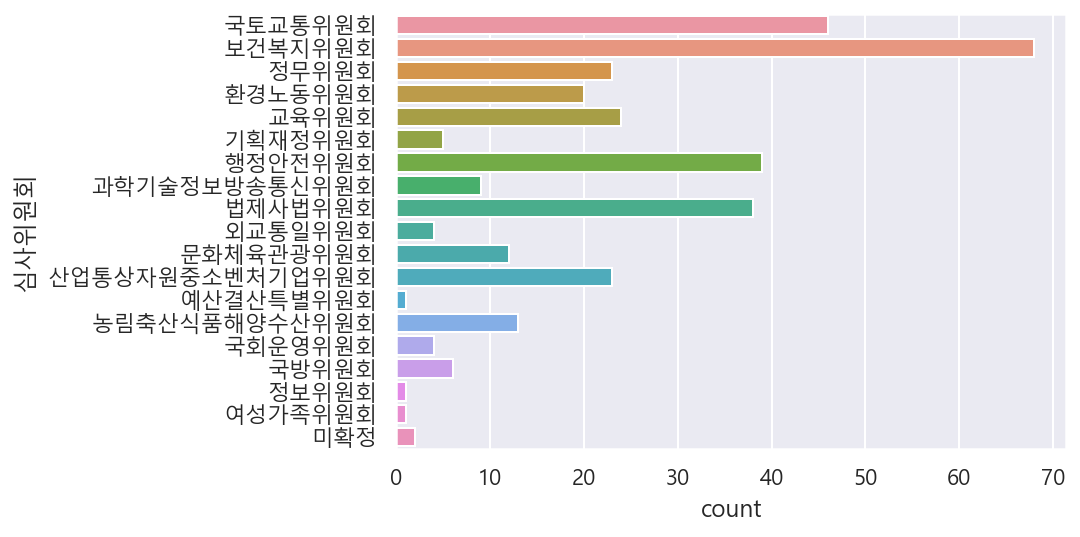

In [ ]:
# 항목을 x축에 놓으면 위원회 이름이 길기 때문에 겹쳐보여서 지저분해 보이는 현상 발생.
# 동기분께서 기준 축을 y축으로 설정하면 (이름들이 가로로 보이게) 해결될 거라고 말씀해주셨다.

In [ ]:
# 사실 시각화는 해본 적도 없고 낯선 개념이라 다른 분들께 많이 여쭤보고 참고도 많이 했다.
# 앞으로 시각화를 제대로 배우게 되면 다양한 코드를 익히면서 조금 더 다채로운 시각화 데이터를 만들어 보고 싶다.